# Oficina 6 - Visualização de dados de vendas

## Introdução e Objetivos

**Para essa trabalharemos com um dataset com registro de vendas ao longo de três meses.**

**O objetivo é identificar padrões através das análises, gerar e responder perguntas**

---
[dataset](https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro07/oficina/arquivos/dadosoficina07.txt)

## 0.0 - Importações

### 0.1 - Importando bibliotecas  

In [430]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

### 0.2 - Importando dataset  

In [447]:
link='https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro07/oficina/arquivos/dadosoficina07.txt'
df = pd.read_csv(link)

## 1.0 - Análises

### 1.1 - Análise informativa

In [448]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


**Observe que é um dataset com apenas dois atributos: Meses e Vendas. Provavelmente é o registro de venda ao longo dos meses, como observado na introdução do estudo, se tratando de um dataset com dados de série temporal.**

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


**Notamos que a coluna `Month` é do tipo `object`. Precisamos converter para o tipo `datetime` afim de efetuar uma análise como série temporal.**

**Convertendo coluna `Month` em tipo `datetime`**

In [450]:
# usamos o atributo format para dizer o formato da data de retorno desejada, nesse caso, mês e dia
df['Month'] = pd.to_datetime(df['Month'], format='%m-%d')

In [451]:
# Podemos observar que os dados foram convertidos
df['Month'].head()

0   1900-01-01
1   1900-01-02
2   1900-01-03
3   1900-01-04
4   1900-01-05
Name: Month, dtype: datetime64[ns]

In [452]:
df['Month'].dtype

dtype('<M8[ns]')

In [453]:
type(df['Month'][0])

pandas._libs.tslibs.timestamps.Timestamp

**Vamos definir a coluna `Month` como índice do DataFrame para facilitar as análise de séries temporal**

In [454]:
df = df.set_index('Month')

In [455]:
df.head()

,Sales
Month,
1900-01-01,266.0
1900-01-02,145.9
1900-01-03,183.1
1900-01-04,119.3
1900-01-05,180.3


**Por fim, podemos renomear a coluna e o índice e acrescentar mais duas colunas referentes ao mês e dia**

In [456]:
df = df.rename(columns={'Sales': 'Vendas'})
df.index.names=['Tempo']
df['Mes'] = df.index.month
df['Dia'] = df.index.day

In [457]:
df.head()

,Vendas,Mes,Dia
Tempo,,,
1900-01-01,266.0,1,1
1900-01-02,145.9,1,2
1900-01-03,183.1,1,3
1900-01-04,119.3,1,4
1900-01-05,180.3,1,5


### 1.2 - Análise exploratória

In [458]:
df.describe()

,Vendas,Mes,Dia
count,36.000000,36.000000,36.00000
mean,312.600000,2.000000,6.50000
std,148.937164,0.828079,3.50102
min,119.300000,1.000000,1.00000
25%,192.450000,1.000000,3.75000
50%,280.150000,2.000000,6.50000
75%,411.100000,3.000000,9.25000
max,682.000000,3.000000,12.00000


**Observações interessantes a serem feitas ao analisar o resultado do `df.describe()`**

- 36 linhas de valores
- 3 meses (1, 2, 3)
- 12 dias por mês (12 primeiros)
- mínimo de vendas de 119,3 de unidade monária
- máximo de vendas de 682,00 de unidade monária

### 1.2.3 - Visualizações

**Vamos começar analisando os meses juntos em uma mesma visualização**

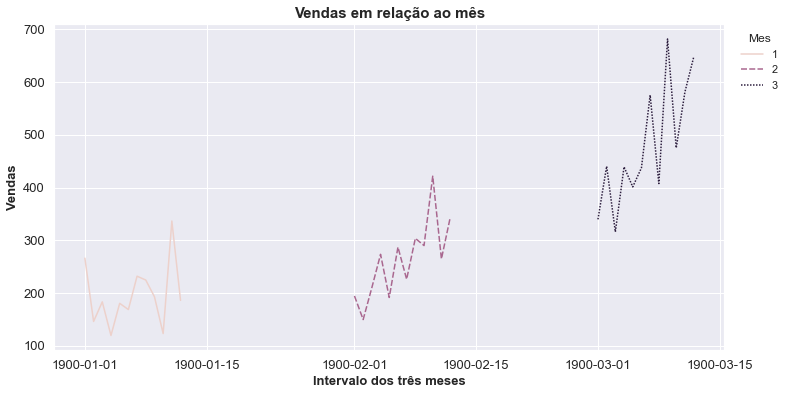

In [459]:
plt.figure(figsize=(12,6))

a = sns.lineplot(x=df.index, y=df['Vendas'], hue=df['Mes'], style=df['Mes'])

# caracterizando gráfico
a.legend(bbox_to_anchor=(1.01, 1), labels=[1,2,3], title='Mes')
plt.title('Vendas em relação ao mês', fontsize=15, fontweight='bold')
a.set_xlabel('Intervalo dos três meses', fontsize=13, fontweight='bold')
a.set_ylabel('Vendas', fontsize=13, fontweight='bold')
plt.tick_params(labelsize=13) # Aumentando o tamanho das etiquetas dos eixos

plt.show()

**Análise**

Perceba que no geral, há uma tendência de crescimento das vendas durante os meses. De início, nos dois primeiros meses, há uma queda no volume de vendas como herança do final do mês anterior, mas ao longo dos primeiros dias do mês - lembrando que se trata de 12 dias apenas- observasse o crescimento no volume de vendas, superando o início do mês.

**obs:** *O espaço vazio entre os meses se deve ao fato de que a coleta de dados ocorreu apenas nos primeiros 12 dias dos meses 01, 02 e 03 observados* 

---

**Vamos analisar as vendas apenas observando o primeiro mês**

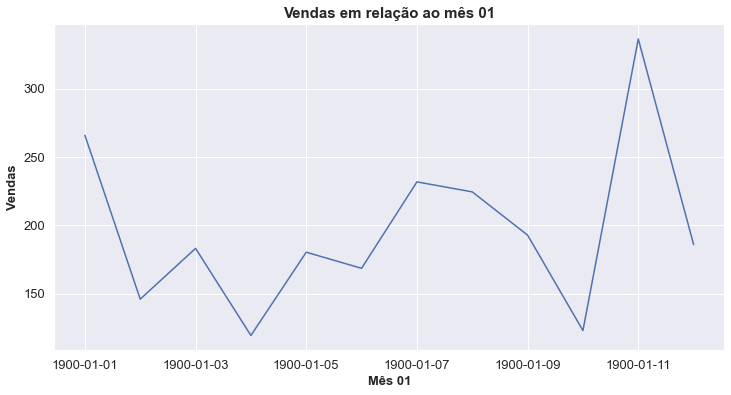

In [464]:
df_m1 = df.iloc[0:12] # Geramos um novo dataframe com as 12 primeiras linhas

plt.figure(figsize=(12,6))

a = sns.lineplot(x=df_m1.index, y=df_m1['Vendas'], legend=False)

# Caracterizando gráfico
plt.title('Vendas em relação ao mês 01', fontsize=15, fontweight='bold')
a.set_xlabel('Mês 01', fontsize=13, fontweight='bold')
a.set_ylabel('Vendas', fontsize=13, fontweight='bold')
plt.tick_params(labelsize=13) # Aumentando o tamanho das etiquetas dos eixos

plt.show()

**Análise**


No inicio do primeiro mês temos um declíno das vendas logo no primeiro dia, e esse declínio se estagna no dia 2 e se mantém oscilante até o dia 10, quando há um pico nas vendas e no dia 11 uma queda pequena que mantém o volume de vendas maior que no início do mês.

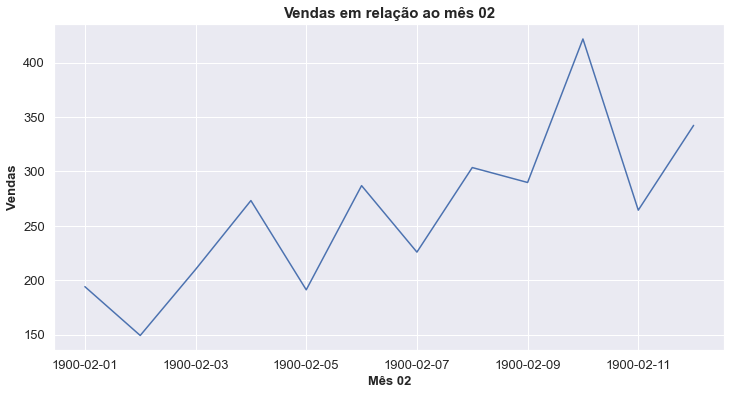

In [465]:
df_m2 = df.iloc[12:24] # Gerando dataset com 2/3 dos dados do dataset original

plt.figure(figsize=(12,6))

# Caracterizando gráfico
a = sns.lineplot(x=df_m2.index, y=df_m2['Vendas'], legend=False)
plt.title('Vendas em relação ao mês 02', fontsize=15, fontweight='bold')
a.set_xlabel('Mês 02', fontsize=13, fontweight='bold')
a.set_ylabel('Vendas', fontsize=13, fontweight='bold')

plt.tick_params(labelsize=13) # Aumentando o tamanho das etiquetas dos eixos

plt.show()

**Análise**


No inicio do 2º mês, assim como no primeiro, temos um declíno das vendas logo no primeiro dia, mas esse declínio rapidamente se converte em ascenção no volume de vendas de maneira oscilante até o dia 09, na qual há o maior aumento de vendas, atingido o máximo global para o intervalo observável no dia 10 e depois caindo um pouco até o dia 11, mas voltando a subir até atingir o dia 12.

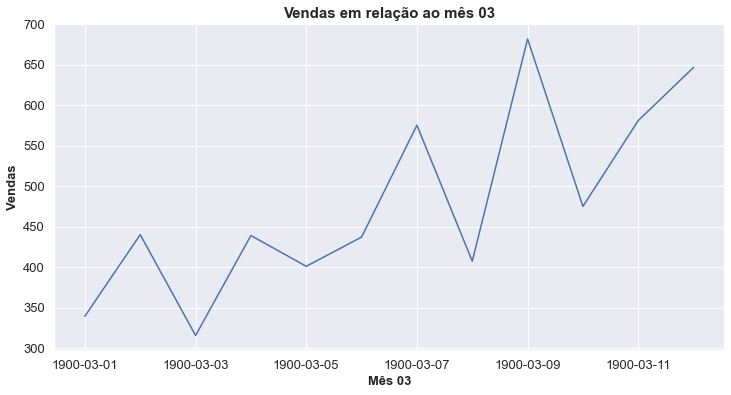

In [468]:
df_m3 = df.iloc[24:36]

plt.figure(figsize=(12,6))

a = sns.lineplot(x=df_m3.index, y=df_m3['Vendas'], legend=False)

plt.title('Vendas em relação ao mês 03', fontsize=15, fontweight='bold')
a.set_xlabel('Mês 03', fontsize=13, fontweight='bold')
a.set_ylabel('Vendas', fontsize=13, fontweight='bold')
plt.tick_params(labelsize=13) # Aumentando o tamanho das etiquetas dos eixos

plt.show()

**Análise**


Diferente dos outros meses, no primeiro dia do mês já temos um aumento nas vendas que se mantém oscilando positivamente até o final do mês.

**Conclusão de análise**

Podemos concluir que, dentre os intervalos observados, é comum uma repetição de queda inicial nos meses, com exceção do terceiro, e um crescimento oscilante no volume de vendas ao longo do tempo. Ou seja, há um ciclo de queda e crescimento oscilante que sempre leva a uma tendência de crescimento do volume de vendas durante os 12 dias iniciais de cada mês.

---

**Vamos analizar e comparar o volume de vendas por mês**

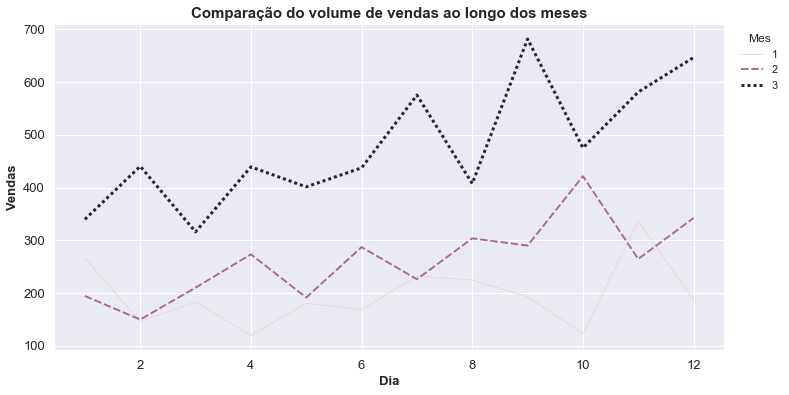

In [473]:
plt.figure(figsize=(12,6))

a = sns.lineplot(x=df['Dia'], y=df['Vendas'], hue=df['Mes'], size=df['Mes'], style=df['Mes'])

# Caracterizando 
a.legend(bbox_to_anchor=(1.01, 1), labels=[1,2,3], title='Mes')
plt.title('Comparação do volume de vendas ao longo dos meses', fontsize=15, fontweight='bold')
a.set_xlabel('Dia', fontsize=13, fontweight='bold')
a.set_ylabel('Vendas', fontsize=13, fontweight='bold')
plt.tick_params(labelsize=13) # Aumentando o tamanho das etiquetas dos eixos

plt.show()

**Análise**

Analisando o gráfico, notamos o que foi dito em observações anteriores: Em todos os meses há um crescimento oscilante das vendas.

Em uma segunda observação, notamos que o volume de vendas nos meses é sempre superior ao anterior, causa do crescimento constante, e que o terceiro mês é o que teve crescimento mais acentuado, enquanto que o pior mês foi o primeiro.


**Vamos comparar o total de vendas em um gráfico de barras**

In [474]:
df_vendas_mes = df.groupby(by='Mes').sum()

In [475]:
df_vendas_mes

,Vendas,Dia
Mes,,
1,2357.5,78
2,3153.5,78
3,5742.6,78


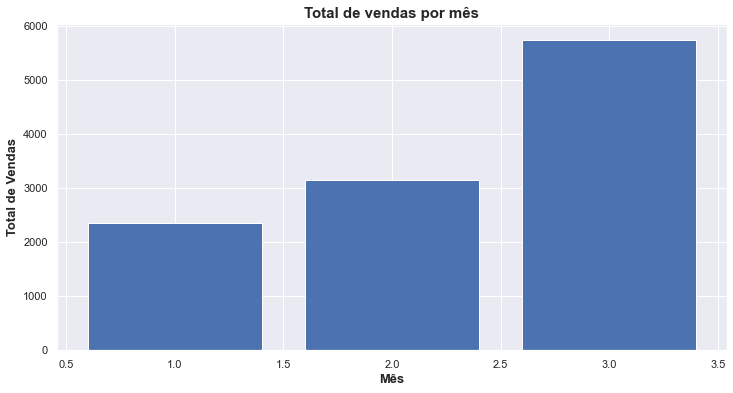

In [481]:
plt.figure(figsize=(12,6))

plt.bar(df_vendas_mes.index, df_vendas_mes['Vendas'])

plt.title('Total de vendas por mês', size=15, weight='bold' )
plt.xlabel('Mês', size=13, weight='bold')
plt.ylabel('Total de Vendas', size=13, weight='bold')

plt.show()

**Análise**

Como observado, o mês três tem um volume maior de vendas, seguido do mês 2, que está afrente do mês 3

**Conclusão**

O volume de vendas no ínicio dos meses (12 primeiros dias) é sempre superior ao mês anterior, isso porque a tendência de crescimento do mês anterior se mantém no mês seguinte e a taxa de crescimento também aumenta, o que é observado na diferença de valores iniciais e finais de cada mês

---

**Como últimas análises, focaremos na média e na variação das vendas**

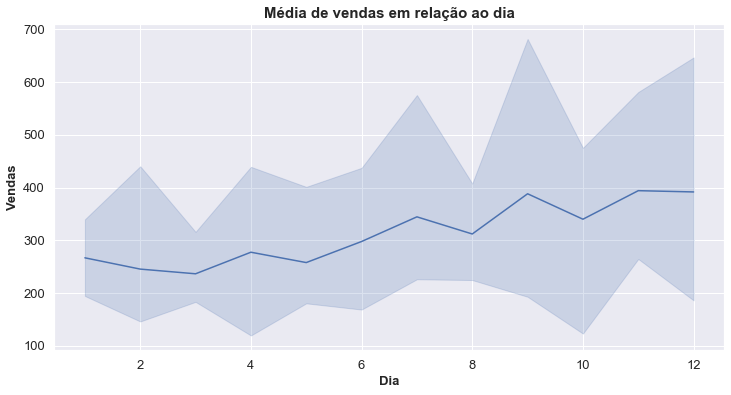

In [482]:
plt.figure(figsize=(12,6))

a = sns.lineplot(x=df['Dia'], y='Vendas', data=df)

plt.title('Média de vendas em relação ao dia', fontsize=15, fontweight='bold')
a.set_xlabel('Dia', fontsize=13, fontweight='bold')
a.set_ylabel('Vendas', fontsize=13, fontweight='bold')
plt.tick_params(labelsize=13) # Aumentando o tamanho das etiquetas dos eixos

plt.show()


**Conclusão**

Observe que o intervalo de confiança em cada dia é muito alto, superando em alguns pontos mais da metade do valor da média. No ínicio do mês, especificamente no dia 3, o intervalo é menor, indicando que há uma menor variação dos valores naquele dia, o que é plausível, já que no início do mês há quase sempre uma queda nos valores nos primeiros dias.

No geral, há uma variação bastante alta e isso é motivado pelo crescimento constante dos valores ao longo dos meses